<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [99]:
sns.__version__

'0.9.0'

In [100]:
dataset = pd.read_csv('the-human-freedom-index/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [101]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [89]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [90]:
pf_cols = [col for col in dataset.columns if 'pf_identity' in col]
print(pf_cols)

['pf_identity_legal', 'pf_identity_parental_marriage', 'pf_identity_parental_divorce', 'pf_identity_parental', 'pf_identity_sex_male', 'pf_identity_sex_female', 'pf_identity_sex', 'pf_identity_divorce', 'pf_identity']


In [92]:
dataset[important_cols]


,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

Resolución:

1.1

In [122]:
rk_pr_id=np.ptp(dataset['pf_identity'])
rk_hf_s=np.ptp(dataset['hf_score'])
dataset['pf_identity'].min()
print('rango de pf= ', rk_pr_id)
print('rango de hs= ', rk_hf_s)

print('\n')

minimo_pf, minimo_hf =dataset[['pf_identity','hf_score']].dropna().min()
maximo_pf,maximo_hf=dataset[['pf_identity','hf_score']].dropna().max()
print('minimo de pf_i= ', minimo_pf)
print('maximo de pf_i= ', maximo_pf)

print('\n')


print('minimo de hf_s= ', minimo_hf)
print('maximo de hf_s= ', maximo_hf)

rango de pf=  10.0
rango de hs=  5.360486062


minimo de pf_i=  0.0
maximo de pf_i=  10.0


minimo de hf_s=  3.765826877
maximo de hf_s=  9.126312939


Resolución:

1.2

In [146]:
mediana_pfW,mediana_hfW=dataset[['pf_identity','hf_score']].dropna().median()
mediana_pfLAC,mediana_hfLAC=dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().median()

media_pfW,media_hfW=dataset[['pf_identity','hf_score']].dropna().mean()
media_pfLAC,media_hfLAC=dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().mean()

desv_pfW,desv_hfW=dataset[['pf_identity','hf_score']].dropna().std()
desv_pfLAC,desv_hfLAC=dataset[dataset['region'] == 'Latin America & the Caribbean'][['pf_identity','hf_score']].dropna().std()

print('mediana de pf en LAC= ', mediana_pfLAC,   'mediana de pf en World= ', mediana_pfW)
print('mediana de hs en LAC= ', mediana_hfLAC,   'mediana de hs en World= ', mediana_hfW)

print('\n')

print('media de pf en LAC= ', media_pfLAC,  'media de pf en World= ', media_pfW)
print('media de hs en LAC= ', media_hfLAC,  'media de hs en World= ', media_hfW)

print('\n')

print('desviacion de pf en LAC= ', desv_pfLAC,  'desviacion de pf en Worl= ', desv_pfW)
print('desviacion de hs en LAC= ', desv_hfLAC,   'desviacion de hf en Worl= ', desv_hfW)



mediana de pf en LAC=  10.0 mediana de pf en World=  9.166666667000001
mediana de hs en LAC=  7.02804474 mediana de hs en World=  6.923840432999999


media de pf en LAC=  8.765086206909483 media de pf en World=  7.33417997096807
media de hs en LAC=  7.047981929952582 media de hs en World=  6.9934437555145


desviacion de pf en LAC=  1.7117319741534658 desviacion de pf en Worl=  3.159472661477449
desviacion de hs en LAC=  0.6089040915687837 desviacion de hf en Worl=  1.0258111611874141


In [165]:
from scipy import stats
mode_pfW_hfW, count_pfW_hfW=stats.mode(dataset[['pf_identity','hf_score']].dropna())

print('Las modas de pf y hf son:',mode_pfW_hfW,'y se repiten', count_pfW_hfW ,'respectivamente')

Las modas de pf y hf son: [[10.          3.76582688]] y se repiten [[601   1]] respectivamente


La variable hf_score involucra demasiados indicadores en su calculo. Y dado de que es un promedio tiene baja repeticion.
Dividiendo en clases los valores 

Resolución:

1.3 No son comparables...

1.4 con dropna no consideramos los NaN

Resolución:

1.5

Text(0.5, 1.0, 'hf_score LAC')

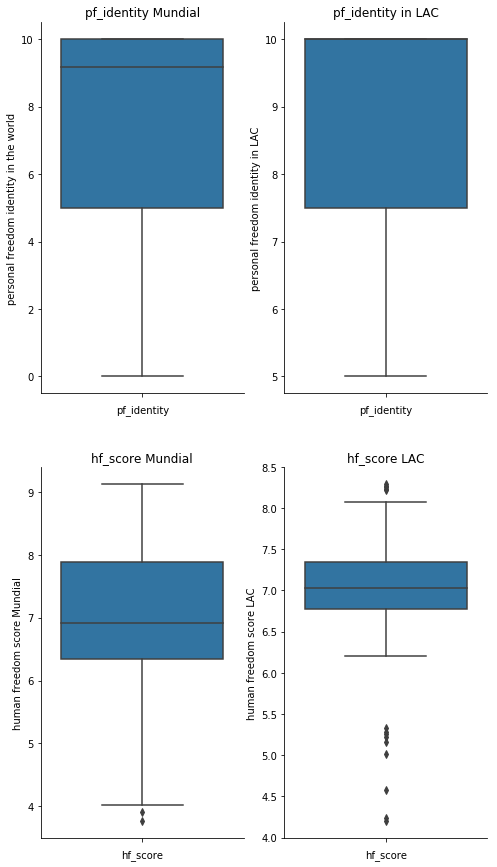

In [191]:
plt.figure(figsize=(8,15))
plt.subplot(2,2,1)
sns.boxplot( y=dataset['pf_identity'].dropna())
               
plt.ylabel('personal freedom identity in the world')
plt.xlabel('pf_identity')
plt.xticks(rotation=45)
sns.despine()
plt.title('pf_identity Mundial')

plt.subplot(2,2,2)
sns.boxplot( y=dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())
      
plt.ylabel('personal freedom identity in LAC')
plt.xlabel('pf_identity')
plt.xticks(rotation=45)
sns.despine()
plt.title('pf_identity in LAC')

plt.subplot(2,2,3)
sns.boxplot( y=dataset['hf_score'].dropna())    
    
plt.ylabel('human freedom score Mundial')
plt.xlabel('hf_score')
plt.xticks(rotation=45)
sns.despine()
plt.title('hf_score Mundial')

plt.subplot(2,2,4)
sns.boxplot( y=dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())  
    
plt.ylabel('human freedom score LAC')
plt.xlabel('hf_score')
plt.xticks(rotation=45)
sns.despine()
plt.title('hf_score LAC')

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

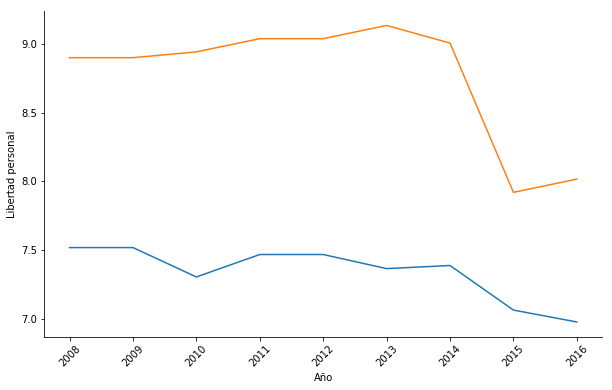

In [203]:
plt.figure(figsize=(10,6))

sns.lineplot(data=dataset,
                  x='year', y='pf_identity',ci=None
                  )
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
             x='year', y='pf_identity',ci=None
                  )
plt.xlabel('Año')
plt.ylabel('Libertad personal')
plt.xticks(rotation=45);
seaborn.despine()

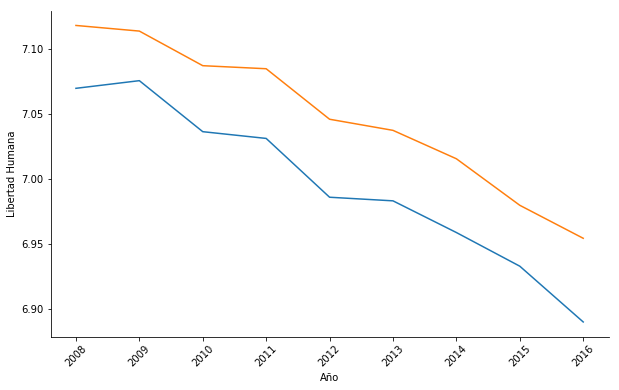

In [204]:
plt.figure(figsize=(10,6))

sns.lineplot(data=dataset,
                  x='year', y='hf_score',ci=None
                  )
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
             x='year', y='hf_score',ci=None
                  )
plt.xlabel('Año')
plt.ylabel('Libertad Humana')
plt.xticks(rotation=45);
seaborn.despine()

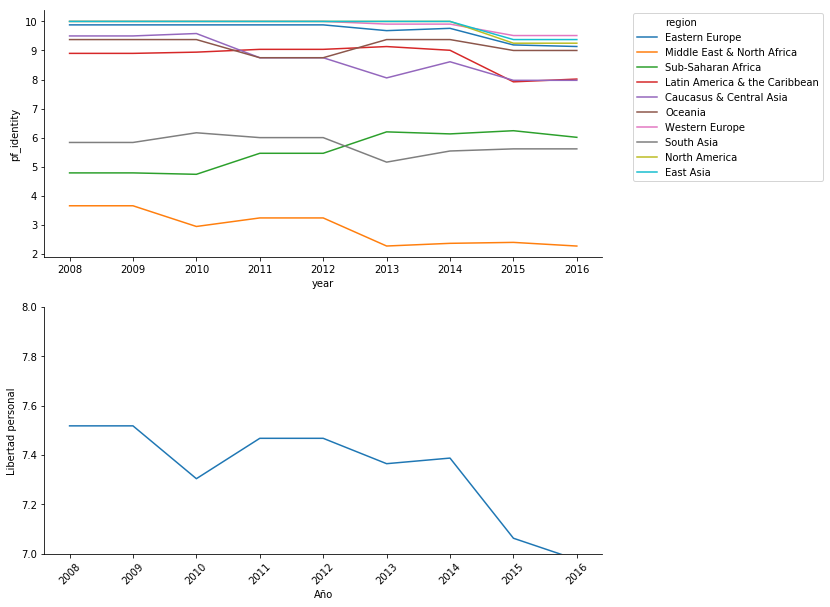

In [226]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(data=dataset,
                  x='year', y='pf_identity',hue='region'
             ,ci=None
                  )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3 )
plt.subplot(2,1,2)
gr=sns.lineplot(data=dataset,
                  x='year', y='pf_identity',ci=None
                  )
plt.xlabel('Año')
plt.ylabel('Libertad personal')
plt.xticks(rotation=45);

gr.axes.set_ylim(7,8)
seaborn.despine()

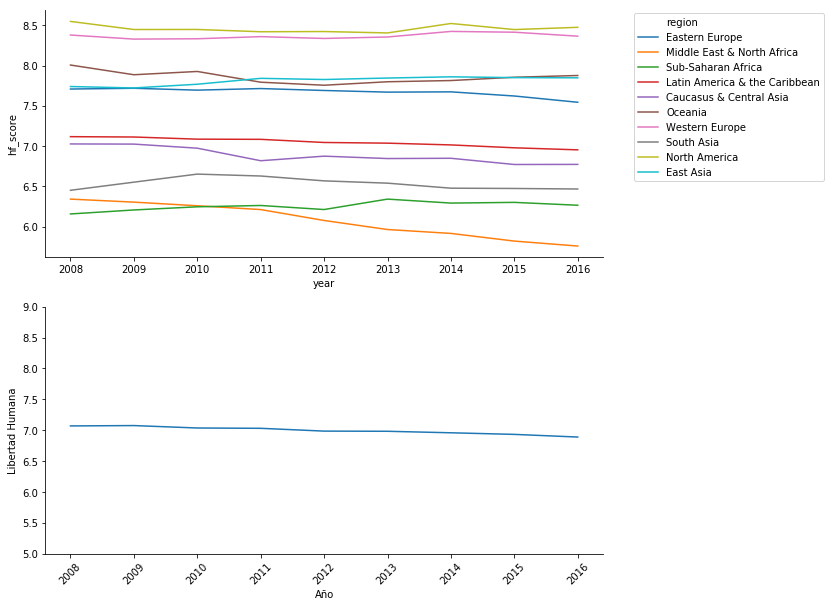

In [225]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(data=dataset,
                  x='year', y='hf_score',hue='region'
             ,ci=None
                  )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3 )
plt.subplot(2,1,2)
gr=sns.lineplot(data=dataset,
                  x='year', y='hf_score',ci=None
                  )
plt.xlabel('Año')
plt.ylabel('Libertad Humana')
plt.xticks(rotation=45);

gr.axes.set_ylim(5,9)
seaborn.despine()

In [234]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
             x='year', y='hf_score', hue='countries', ci=None
                  )

plt.subplot(2,1,2)
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean']
                  x='year', y='hf_score',ci=None
                  )
plt.xlabel('Año')
plt.ylabel('Libertad Humana')
plt.xticks(rotation=45);

seaborn.despine()

SyntaxError: invalid syntax (<ipython-input-234-ccd0736cbfb5>, line 9)

Tendencia de hf_score y ef_score a través de los años.

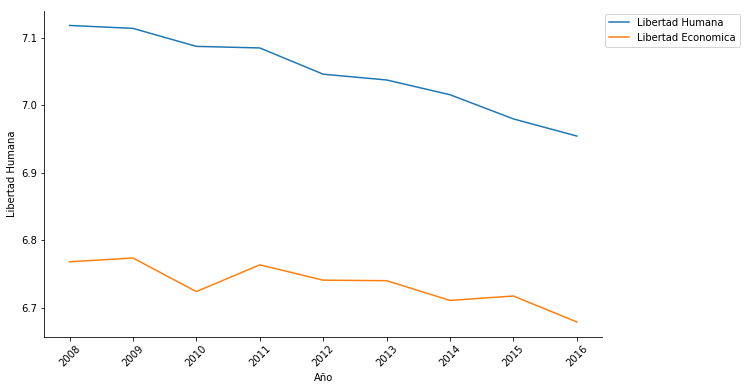

In [242]:
plt.figure(figsize=(10,6))

sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
             x='year', y='hf_score',ci=None
                  )
sns.lineplot(data=dataset[dataset['region'] == 'Latin America & the Caribbean'],
             x='year', y='ef_score',ci=None
                  )
plt.legend(('Libertad Humana','Libertad Economica'),bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.3 )
plt.xlabel('Año')
plt.ylabel('Libertad Humana')
plt.xticks(rotation=45);
seaborn.despine()

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

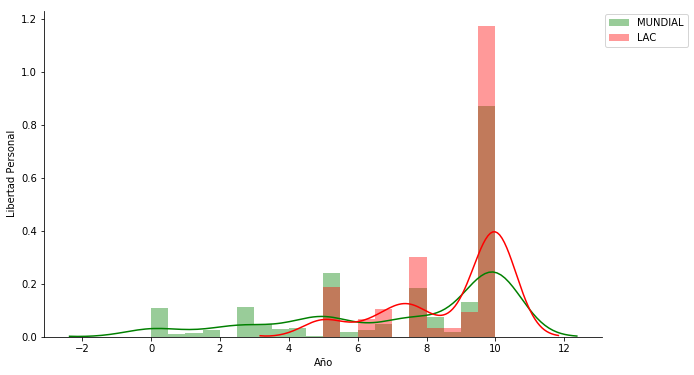

In [253]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['pf_identity'], color='g', bins=20, label='MUNDIAL')
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'], color='r', bins=10, label='LAC')
plt.legend(('MUNDIAL','LAC'),bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.3 )
plt.xlabel('Año')
plt.ylabel('Libertad Personal')
sns.despine()

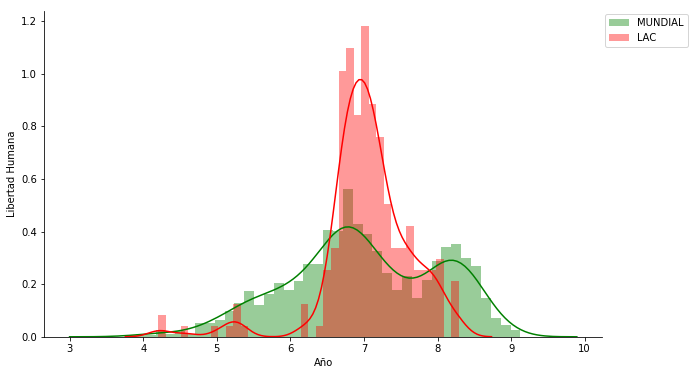

In [255]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['hf_score'], color='g', bins=40, label='MUNDIAL')
sns.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'], color='r', bins=40, label='LAC')
plt.legend(('MUNDIAL','LAC'),bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.3 )
plt.xlabel('Año')
plt.ylabel('Libertad Humana')
sns.despine()

In [258]:
loc, scale = stats.norm.fit(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
loc, scale

(7.047981929952586, 0.6075903811029444)

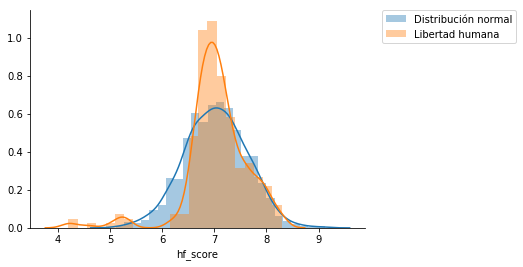

In [264]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), label='Libertad humana')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

In [275]:
percs = np.linspace(0,100,51)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = np.percentile(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())), percs)

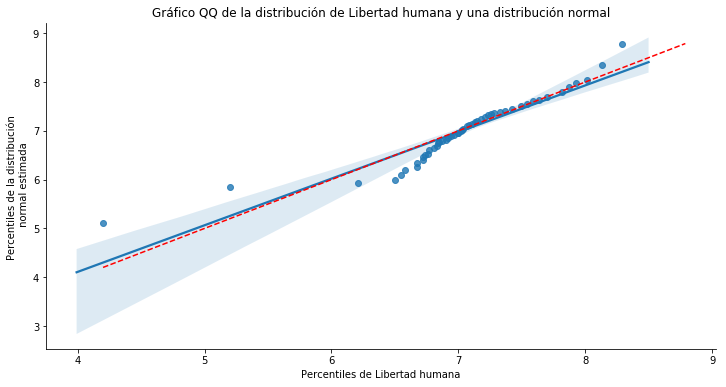

In [276]:
plt.figure(figsize=(12,6))
sns.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de Libertad humana')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de Libertad humana y una distribución normal')

x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='r', ls="--")

seaborn.despine()

In [272]:
sk=stats.skew(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
print(sk)

-1.442092151332142


In [273]:
kurt=stats.kurtosis(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())
print(kurt)

5.340188962725749


## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
